In [8]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd
import copy
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# 設定 data_path
dir_data = './data/'
Train = os.path.join(dir_data, 'train.csv')
Test = os.path.join(dir_data, 'test.csv')
train_Y = np.log1p(Train_data['total_price'])
ids = Test_data['building_id']
Train_data = Train_data.drop(['building_id', 'total_price'] , axis=1)
Test_data = Test_data.drop(['building_id'] , axis=1)

df = pd.concat([Train_data,Test_data])

df.head()
# 讀取檔案
Train_data = pd.read_csv(Train)
Test_data = pd.read_csv(Test)

In [15]:
train_Y = np.log1p(Train_data['total_price'])
ids = Test_data['building_id']
Train_data = Train_data.drop(['building_id', 'total_price'] , axis=1)
Test_data = Test_data.drop(['building_id'] , axis=1)

df = pd.concat([Train_data,Test_data])

df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,8,21,20385,24,0,2,18325,0,NaN,81138.889762,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,2,18,1,47,1,2587,1,7442,1,124.131236


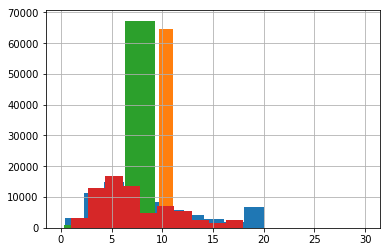

In [16]:
from scipy import stats

df['building_area'] = df['building_area'].clip(0.3, 20)
df['building_area'].hist()

df['parking_price'].replace({np.nan: df['parking_price'].mean()}, inplace = True)
df['parking_price'] = np.log1p(df['parking_price'])
df['parking_price'].hist()

df['parking_area'].replace({np.nan: df['parking_area'].mean()}, inplace = True)
df['parking_area'] = df['parking_area'].clip(0.35, 30)
df['parking_area'].hist()

df['land_area'] = df['land_area'].clip(2.22, 100)
df['land_area'] = stats.boxcox(df['land_area'], lmbda=0.5)
df['land_area'].hist()

In [17]:
df = df.fillna(df.mean())

In [13]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
estimator = RandomForestRegressor()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8831127903120446

In [228]:
estimator.fit(train_X, train_Y)

test_X = df[train_num:]
predict = estimator.predict(test_X)

test_price = np.expm1(predict)

submit = pd.DataFrame(ids)
submit['total_price'] = test_price.astype(np.int32)
submit.to_csv("2019-05-12.csv",index=False)